# Loading the data

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('./data/Processed_Video_QoE_Modeling.csv')
emoc = df.Emocije.replace({1:'Raspolozen', 2: 'Neraspolozen', 3:'Ostalo'})
loc = df.Lokacija.replace({1:'Kuca', 2: 'Posao', 3:'Kafic', 4: 'Hotel'})
guzva = df.Guzva.replace({1:'Ne', 2: 'Slabo', 3:'Srednje', 4: 'Da', 5: 'Jako'})

df['Emocije'] = emoc
df['Lokacija'] = loc
df['Guzva'] = guzva

df.head()

,Osoba,God,NM_Spol,StepenObrazovanja,PrethodnoIskustvo,Naocale,Sluh,Ruka,Emocije,Lokacija,...,P4.4,P4.5,P4.6,P4.7,P4_AVG,Dan,Mjesec,Godina,Tip_dana,Dio_dana
0,1,48,1,3,4,1,2,2,Raspolozen,Kuca,...,4,4,5,5.0,4.571429,4,5,2017,weekday,evening
1,1,48,1,3,4,1,2,2,Raspolozen,Kuca,...,4,4,5,5.0,4.571429,4,5,2017,weekday,evening
2,1,48,1,3,4,1,2,2,Raspolozen,Kuca,...,4,4,5,5.0,4.571429,4,5,2017,weekday,evening
3,1,48,1,3,4,1,2,2,Raspolozen,Kuca,...,4,4,5,5.0,4.571429,4,5,2017,weekday,evening
4,1,48,1,3,4,1,2,2,Raspolozen,Kuca,...,4,4,5,5.0,4.571429,4,5,2017,weekday,evening


# Data Analysis


## Age analysis

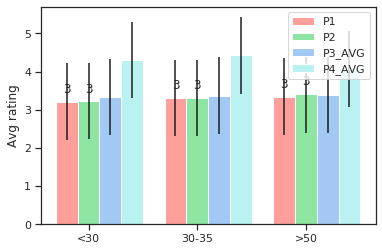

In [91]:
def agegroup(row):
    try:
        if (int(row.God) < 30):
            return '<30'
        if (int(row.God) >=30) and(int(row.God) < 50) :
            return "30-50"
        else:
            return ">=50"
    except:
        return

P1Code = {1: 'Loša', 2: 'Slaba', 3: 'Umjerena', 4: 'Dobra', 5: 'Odlicna'}
P234Code = {1: 'uopće se ne slažem', 2: 'ne slažem se', 3: 'nemam mišljenje', 4: 'slažem se', 5: 'potpuno se slažem'}


#Looking into the average ratings for three age groups
group1 = df.loc[df['God'] < 30] 
group1mean = group1.mean(axis = 0)
group1std = group1.std(axis = 0)


group2 = df.loc[(df['God'] >= 30) & (df['God'] < 50)] 
group2mean = group2.mean(axis = 0)
group2std = group2.std(axis = 0)


group3 = df.loc[df['God'] >= 50] 
group3mean = group3.mean(axis = 0)
group3std = group3.std(axis = 0)
N = 3
ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars




fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, [group1mean.P1, group2mean.P1, group3mean.P1], width, yerr = [1,1,1], color='r')
rects2 = ax.bar(ind + width, [group1mean.P2, group2mean.P2, group3mean.P2], width, yerr = [1,1,1], color='g')
rects3 = ax.bar(ind+2*width, [group1mean.P3_AVG, group2mean.P3_AVG, group3mean.P3_AVG], width, yerr = [1,1,1], color='b')
rects4 = ax.bar(ind+width*3, [group1mean.P4_AVG, group2mean.P4_AVG, group3mean.P4_AVG], width, yerr = [1,1,1], color='c')


ax.set_ylabel('Avg rating')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('<30', '30-35', '>50') )
ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0]), ('P1', 'P2', 'P3_AVG', 'P4_AVG') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

What is noticeable is that there is no observable difference in responses across the age groups. In all age groups P4_AVG seems to be getting a higher rating than other questions (while in group >50 age seems to be the lowest of them all).

# Proportion of interviewees from two genders (female and male) given their previous experience (PrethodnoIskustvo) 

First we will see what the distributions are on certain attributes. The first plot below shows the distribution of people with previous experience of using streaming data (PrethodnoIskustvo). 

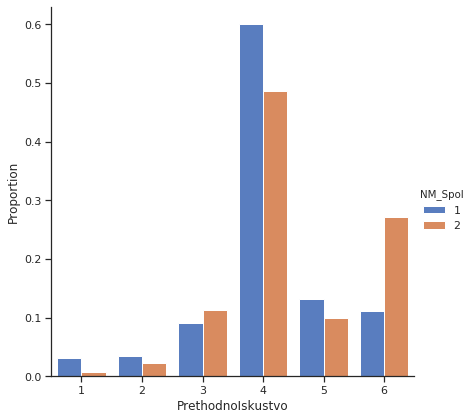

In [92]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


x, y, hue = "PrethodnoIskustvo", "Proportion", "NM_Spol"
df2 = df.groupby(['NM_Spol', 'PrethodnoIskustvo']).size().reset_index(name='gender_count')
s = df.NM_Spol.value_counts()
df2['Proportion'] = df2['gender_count'].div(df2['NM_Spol'].map(s))
g = sns.catplot(x="PrethodnoIskustvo", y="Proportion", hue="NM_Spol", data=df2,
                height=6, kind="bar", palette="muted")


We see that the majority of the interviewees fall into level 4 experience (~60% of men (1) and ~49% of women (2)). What is evident is that in the highest experience group (6) we have women dominating in numbers: 11% of men (1) and 27% women (2).

# Relationship between P4_AVG and some other variables

## Relationship between P4_AVG and PrethodnoIskustvo

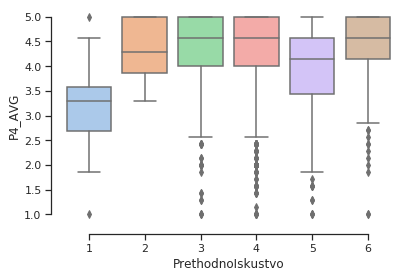

In [93]:
import seaborn as sns

sns.set(style="ticks", palette="pastel")

sns.boxplot(x="PrethodnoIskustvo", y="P4_AVG",
            data=df)
sns.despine(offset=10, trim=True)

It is noticeable that the first group of previous experience (Group 1: "Jednom mjesečno") usually gives a lower rating than other groups. (Rating 3 means the person didn't have a particular opinion on some question from group P4). The first two groups don't have as much outliers as groups 3, 4, 5, and 6. This might indicate that people with higher experience are both experienced and didn't have difficulties using the application, but that they also tend to be more critical and give lower extreme lower ratings (hence the outliers). Groups 3, 4 and 6 have very similar responses with group 6 having slightly less variability. 

## Relationship between P4_AVG and age groups

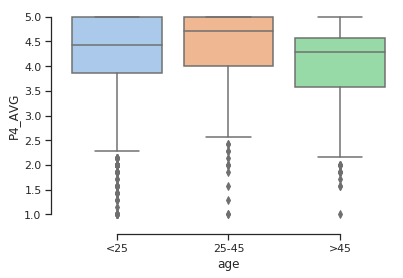

In [94]:
newDF = pd.DataFrame()
bin_labels_3 = ['<25', '25-45', '>45']

#binning age into three categories
newDF['age'] = pd.cut(df['God'],[0, 25 , 45, 100], labels = bin_labels_3)
newDF['P4_AVG'] = df['P4_AVG']

#group by age
newDF.groupby("age")["P4_AVG"]
sns.set(style="ticks", palette="pastel")

sns.boxplot(x="age", y="P4_AVG",
            data=newDF)
sns.despine(offset=10, trim=True)




The youngest age group seems to be evenly distributed about their rating, but still have quite some outliers. For Age groups 25-45 and >45 even though the median rating is rather high, the distribution is more skewed with the majority rating values falling in the lower tange.

## Relationship between P4_AVG and emotion

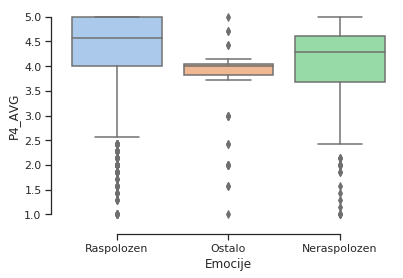

In [95]:
sns.set(style="ticks", palette="pastel")
sns.boxplot(x="Emocije", y="P4_AVG",
            data=df)
sns.despine(offset=10, trim=True)

It is noticeable that Emotion (2) - Neraspolozen tends to give a lower rating. Same with emotion marked as Other (Ostalo) having outlier both on positive and negative side.

## Relationship between P3_AVG and emotion

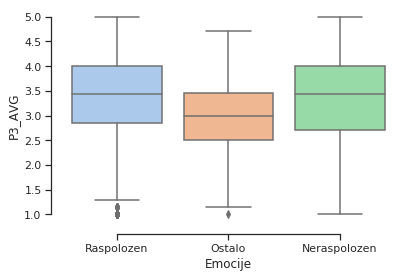

In [96]:
sns.set(style="ticks", palette="pastel")
sns.boxplot(x="Emocije", y="P3_AVG",
            data=df)
sns.despine(offset=10, trim=True)

# Relationship between Location and Ratings

Since Location is not an ordinal variable, we will see the relationship between Location and ratings with boxplots.

## Relationship between P4_AVG and Location

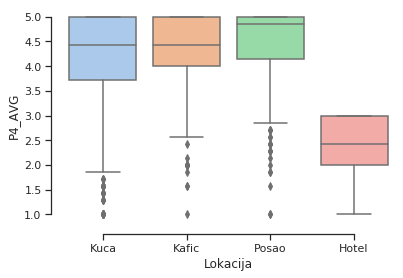

In [97]:
sns.set(style="ticks", palette="pastel")
sns.boxplot(x="Lokacija", y="P4_AVG",
            data=df)
sns.despine(offset=10, trim=True)

## Relationship between P3_AVG and Location

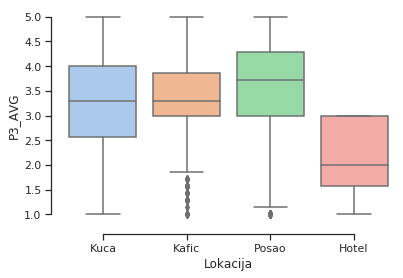

In [102]:
sns.set(style="ticks", palette="pastel")
sns.boxplot(x="Lokacija", y="P3_AVG",
            data=df)
sns.despine(offset=10, trim=True)

## Relationship between P1 and Location

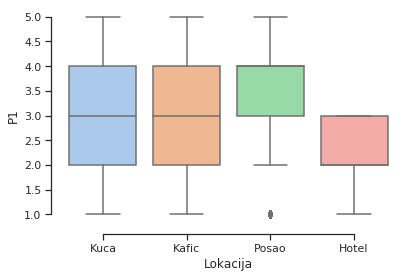

In [103]:
sns.set(style="ticks", palette="pastel")
sns.boxplot(x="Lokacija", y="P1",
            data=df)
sns.despine(offset=10, trim=True)

## Relationship between P2 and Location

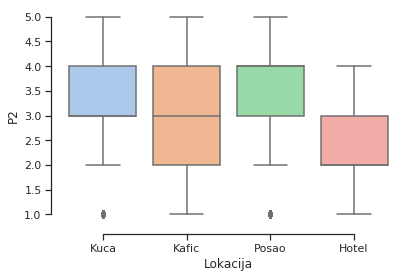

In [105]:
sns.set(style="ticks", palette="pastel")
sns.boxplot(x="Lokacija", y="P2",
            data=df)
sns.despine(offset=10, trim=True)

It seems that people at hotels give rather low ratings.

## Relationship between P4_AVG and Crowd and Noise

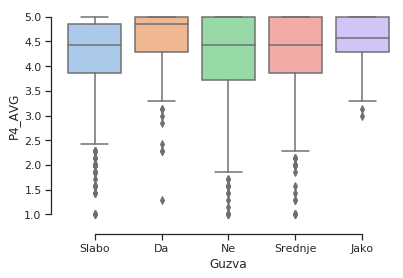

In [98]:
sns.set(style="ticks", palette="pastel")
sns.boxplot(x="Guzva", y="P4_AVG",
            data=df)
sns.despine(offset=10, trim=True)

Oddly, there is a positive correlation between crowd and P4_AVG (see correlation matrix). So it can be seen that for Crowd level 4 and 5 the ratings are rather high, there is less variance in the ratings, and there are no as many outliers.

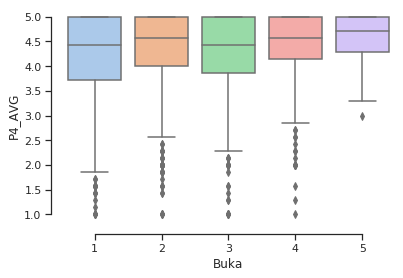

In [99]:
sns.set(style="ticks", palette="pastel")
sns.boxplot(x="Buka", y="P4_AVG",
            data=df)
sns.despine(offset=10, trim=True)

Similarly, the highest noise level gives high rating with less variance. It might be because there is a small positive correlation between noise level and crowd level and bitrate. 

      Guzva Lokacija  lokacija_count
0        Da    Kafic             255
1        Da     Kuca              93
2        Da    Posao             159
3      Jako    Kafic             172
4      Jako     Kuca             120
5      Jako    Posao              48
6        Ne    Hotel              15
7        Ne     Kuca             904
8        Ne    Posao             125
9     Slabo    Kafic             316
10    Slabo     Kuca             418
11    Slabo    Posao             249
12  Srednje    Kafic             267
13  Srednje     Kuca             244
14  Srednje    Posao             344


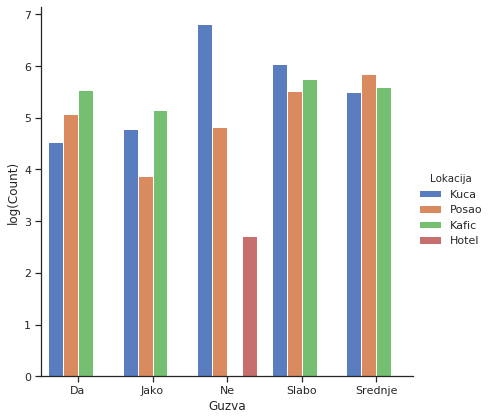

In [100]:
#histogram of location vs guzva
df2g = df.groupby(['Guzva', 'Lokacija']).size().reset_index(name='lokacija_count')
print(df2g)
df2g['log(Count)'] = np.log(df2g['lokacija_count'])
g = sns.catplot(x="Guzva", y="log(Count)", hue="Lokacija", data=df2g,
                height=6, kind="bar", palette="muted", row_order = ['Ne', 'Slabo', 'Srednje', 'Da', 'Jako'],
                hue_order = ['Kuca', 'Posao', 'Kafic', 'Hotel'])


It seems that the largest crowds (Jako - 5) are at a bar (Kafic) and at Home (Kuca), with a bar (Kafic) being the highest crowd. On the other hand, people at hotel all said there was no crowd at the hotel, and still they gave low ratings on P4_AVG.

## Emotion versus Location

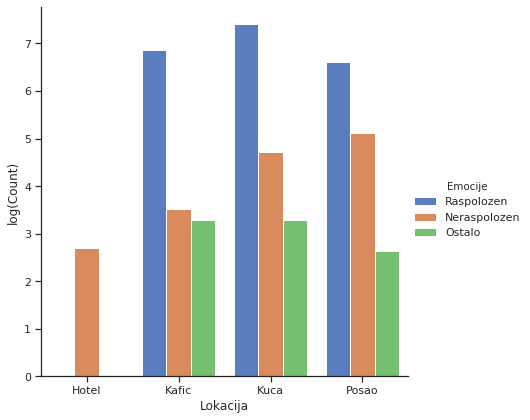

In [101]:
#histogram of emotion vs location
df2g = df.groupby(['Lokacija', 'Emocije']).size().reset_index(name='emotion_count')
df2g['log(Count)'] = np.log(df2g['emotion_count'])
g = sns.catplot(x="Lokacija", y="log(Count)", hue="Emocije", data=df2g,
                height=6, kind="bar", palette="muted", hue_order = ['Raspolozen', 'Neraspolozen', 'Ostalo'])



Hotel location (4) has only 15 respondents and all of them marked their emotion as 2 ("Neraspolozen"). :D